## Questions
This homework involves using multiple linear regression on the Auto data set.

Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors.

Use the summarize() function to print the results. Comment on the output. For instance:


- Is there a relationship between the predictors and the response? Use the p-values to answer this question.
- Which predictors appear to have a statistically significant relationship to the response?
- What does the coefficient for the year variable suggest?

Fit some models with interactions as described in the lab. Comment on the results - are any interactions statistically significant?

What to submit:
1. A Python notebook containing all your codes. Ensure a proper number of your notebook cells to reflect the questions. Ensure the notebook can run without errors.
2. A text file (word/pdf) containing all your answers, comments, and discussions. Plagiarism and AI-generated text are strictly checked and prohibited. You will score low points if caught. Always attribute sources and ensure your submission truly reflects your understanding and effort.

You must submit these two files separately. PLEASE DON'T PUT THEM TOGETHER IN A ZIP FILE.


In [ ]:
!pip install islp

In [ ]:
# organized imports into one cell
from ISLP import load_data
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS
from ISLP.models import summarize
import seaborn as sbs

In [ ]:
Auto = load_data('Auto') # load data
# Auto.columns
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# slicing dataset as discussed in question
y = Auto['mpg']
x_design = MS(list(Auto.columns.drop(['mpg' , 'name'])))
X = x_design.fit_transform(Auto) # intercept created
X

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,1.0,8,307.0,130,3504,12.0,70,1
1,1.0,8,350.0,165,3693,11.5,70,1
2,1.0,8,318.0,150,3436,11.0,70,1
3,1.0,8,304.0,150,3433,12.0,70,1
4,1.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
387,1.0,4,140.0,86,2790,15.6,82,1
388,1.0,4,97.0,52,2130,24.6,82,2
389,1.0,4,135.0,84,2295,11.6,82,1
390,1.0,4,120.0,79,2625,18.6,82,1


In [ ]:
model = sm.OLS(y,X) # create a model
res = model.fit() # train the model
res

In [ ]:
summarize(res) # summary to answer questions

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


<ipython-input-13-184d1e5c5ee0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbs.heatmap(Auto.corr() , annot=True , cmap='YlGnBu')


<Axes: >

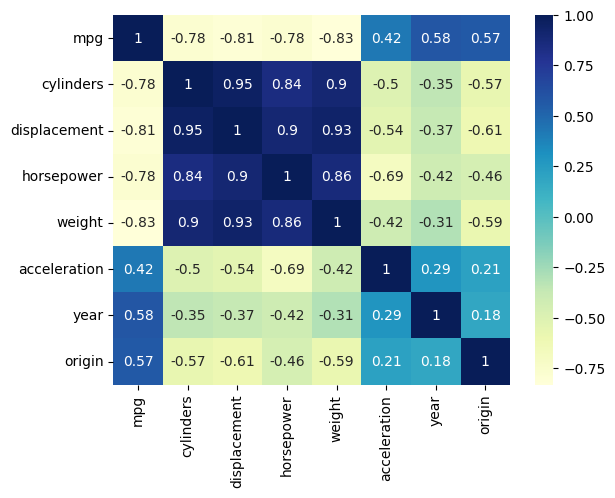

In [ ]:
# Note – I plotted heatmap just for my personal understanding to visualize correlation clearly
sbs.heatmap(Auto.corr() , annot=True , cmap='YlGnBu')
# origin (according to stats), year, weight, and displacement

In [ ]:
# X_predictors = list(Auto.columns.drop(['mpg' , 'name' , 'year' , 'displacement'] )) + [('year' , 'displacement')]
# X_predictors = list(Auto.columns.drop(['mpg' , 'name' , 'cylinders' , 'horsepower'] )) + [('cylinders' , 'horsepower')]
# X_predictors = list(Auto.columns.drop(['mpg' , 'name' , 'cylinders' , 'acceleration'] )) + [('cylinders' , 'acceleration')]
# X_predictors = list(Auto.columns.drop(['mpg' , 'name' , 'cylinders' , 'acceleration'] )) + [('cylinders' , 'acceleration')]
X_predictors = list(Auto.columns.drop(['mpg' , 'name' , 'horsepower' , 'acceleration'] )) + [('horsepower' , 'acceleration')]
x_design2 = MS(X_predictors)
X2 = x_design2.fit_transform(Auto) # intercept created
X2.head()

,intercept,cylinders,displacement,weight,year,origin,horsepower:acceleration
0,1.0,8,307.0,3504,70,1,1560.0
1,1.0,8,350.0,3693,70,1,1897.5
2,1.0,8,318.0,3436,70,1,1650.0
3,1.0,8,304.0,3433,70,1,1800.0
4,1.0,8,302.0,3449,70,1,1470.0


In [ ]:
model2 = sm.OLS(y,X2) # create a model
res2 = model2.fit() # train the model
# res.predict()
summarize(res2)

,coef,std err,t,P>|t|
intercept,-15.0106,4.067,-3.691,0.000
cylinders,-0.3656,0.317,-1.153,0.250
displacement,0.0077,0.007,1.160,0.247
weight,-0.0047,0.001,-6.446,0.000
year,0.7428,0.050,14.994,0.000
origin,1.2877,0.263,4.897,0.000
horsepower:acceleration,-0.0036,0.001,-3.808,0.000
